# Predicting Precipitation in Austin Using Linear Regression

This project aims to build a linear regression model to predict precipitation in Austin, Texas. We will use a dataset of Austin's daily weather to train our model. The process will involve loading the data, cleaning and preprocessing it, conducting exploratory data analysis (EDA) to understand the relationships between different weather attributes, and finally, building and evaluating the predictive model.

## 1. Data Loading and Initial Exploration

First, we'll load the `austin_weather.csv` dataset into a pandas DataFrame. We'll then inspect the first few rows and the data types of each column to get an initial understanding of the data we're working with.

In [1]:
import pandas as pd

# Load the dataset
try:
    df = pd.read_csv('austin_weather.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("The file 'austin_weather.csv' was not found. Please check the file path.")

# Display the first few rows and info to understand the data
print("Initial Data Head:")
display(df.head())
print("\nInitial Data Info:")
df.info()

Dataset loaded successfully.
Initial Data Head:


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,



Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         

## 2. Data Cleaning and Preprocessing

The dataset contains some special values like 'T' for trace precipitation and '-' for missing data. We need to handle these to make the data suitable for a machine learning model.

Our cleaning and preprocessing steps are:
1.  **Replace Special Characters**: We'll replace 'T' with a small numerical value (0.005) and '-' with `NaN` (Not a Number).
2.  **Drop Irrelevant Columns**: The `Events` and `Date` columns won't be used in our simple linear regression model, so we'll drop them. We'll also remove the high/low sea level pressure columns to use the average.
3.  **Convert to Numeric**: We will convert all columns to a numeric data type.
4.  **Handle Missing Values**: We'll fill any remaining missing values (`NaN`) with the median of their respective columns.

In [2]:
import numpy as np

# Replace 'T' (trace) and '-' with numerical-friendly values
df.replace('T', 0.005, inplace=True)
df.replace('-', np.nan, inplace=True)

# Drop columns that are not needed for this model
df = df.drop(columns=['Events', 'Date', 'SeaLevelPressureHighInches', 'SeaLevelPressureLowInches'])

# Convert all columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing values with the median of each column
for col in df.columns:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

print("Data Info After Cleaning:")
df.info()

Data Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TempHighF                  1319 non-null   int64  
 1   TempAvgF                   1319 non-null   int64  
 2   TempLowF                   1319 non-null   int64  
 3   DewPointHighF              1319 non-null   float64
 4   DewPointAvgF               1319 non-null   float64
 5   DewPointLowF               1319 non-null   float64
 6   HumidityHighPercent        1319 non-null   float64
 7   HumidityAvgPercent         1319 non-null   float64
 8   HumidityLowPercent         1319 non-null   float64
 9   SeaLevelPressureAvgInches  1319 non-null   float64
 10  VisibilityHighMiles        1319 non-null   float64
 11  VisibilityAvgMiles         1319 non-null   float64
 12  VisibilityLowMiles         1319 non-null   float64
 13  WindHighMPH           

C:\Users\vishv\AppData\Local\Temp\ipykernel_20172\2514181289.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


## 3. Exploratory Data Analysis (EDA)

Before building the model, we'll explore the data to identify trends and correlations. We'll create two key visualizations:
1.  **Precipitation Trends Over Time**: A line plot to see how precipitation has varied over the period covered by the dataset.
2.  **Correlation Heatmap**: A heatmap to show the correlation between all the numerical weather attributes. This will help us understand which factors are most strongly related to precipitation.

C:\Users\vishv\AppData\Local\Temp\ipykernel_20172\3153098709.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_for_plot['PrecipitationSumInches'].replace('T', 0.005, inplace=True)


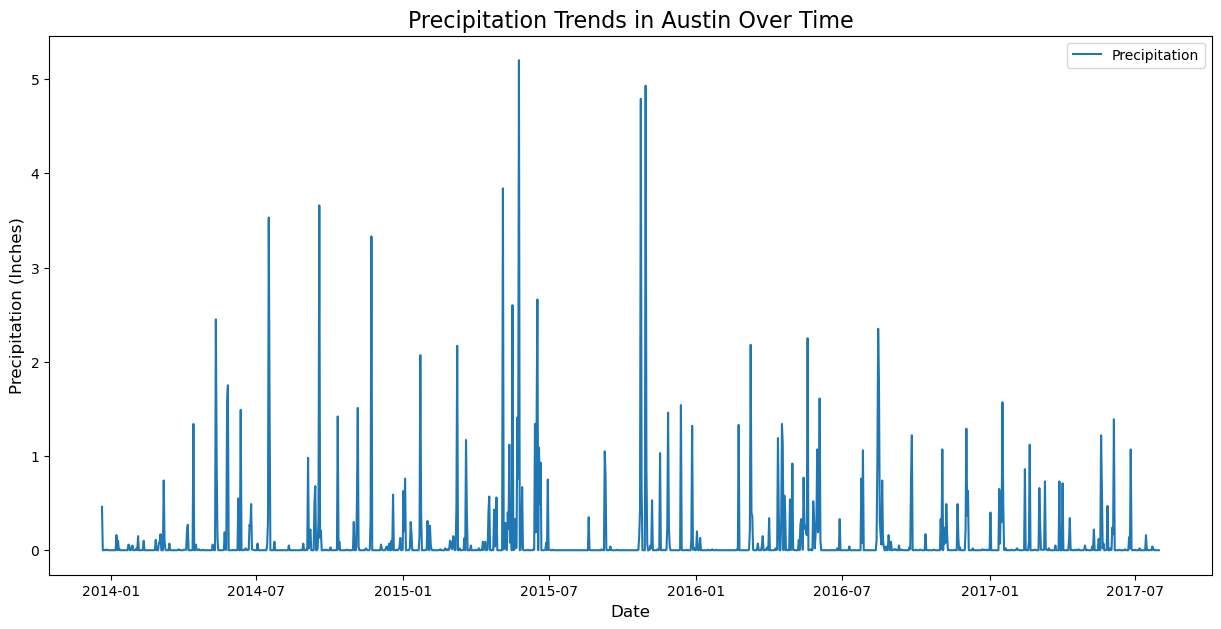

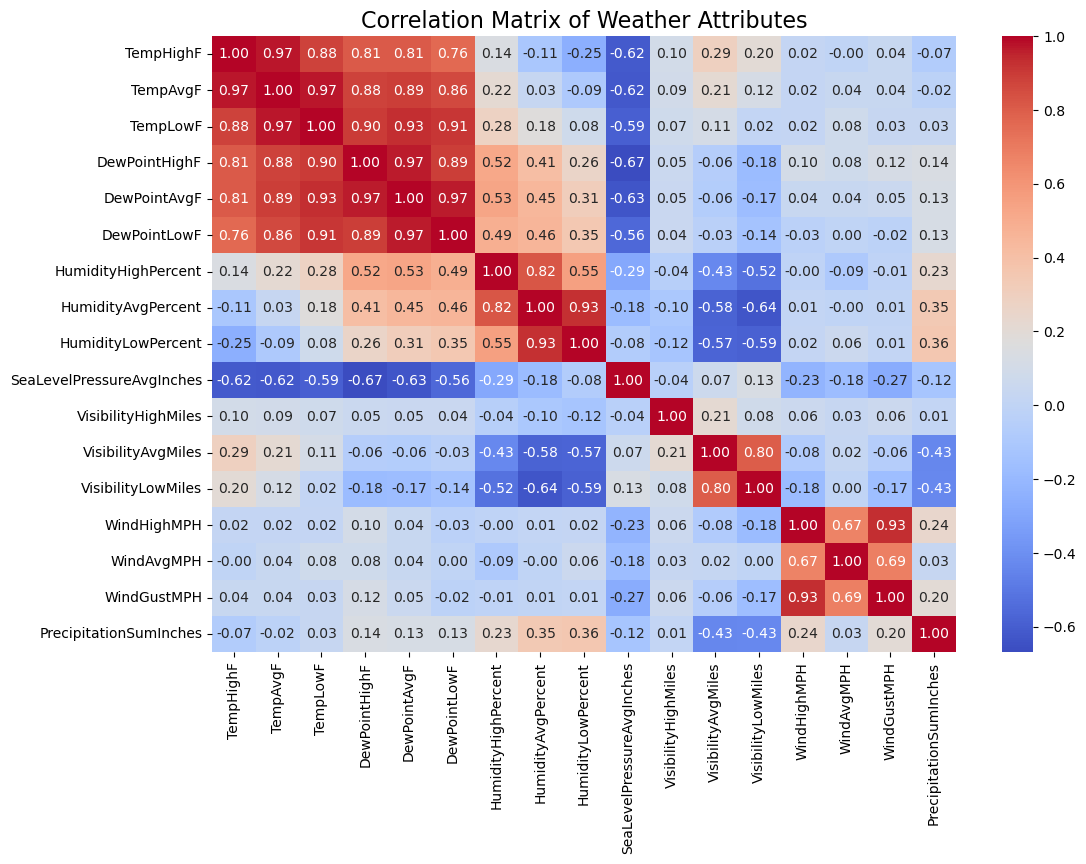

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reload original data to plot trends over time with the original dates
df_for_plot = pd.read_csv('austin_weather.csv')
df_for_plot['Date'] = pd.to_datetime(df_for_plot['Date'])
df_for_plot['PrecipitationSumInches'].replace('T', 0.005, inplace=True)
df_for_plot['PrecipitationSumInches'] = pd.to_numeric(df_for_plot['PrecipitationSumInches'], errors='coerce')

# Visualize precipitation trends
plt.figure(figsize=(15, 7))
plt.plot(df_for_plot['Date'], df_for_plot['PrecipitationSumInches'], label='Precipitation')
plt.title('Precipitation Trends in Austin Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Precipitation (Inches)', fontsize=12)
plt.legend()
plt.savefig('precipitation_trends.png')
plt.show()

# Visualize correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Weather Attributes', fontsize=16)
plt.savefig('weather_correlation.png')
plt.show()

## 4. Linear Regression Modeling

Now, we'll build our linear regression model.
1.  **Define Features and Target**: Our target variable `y` is `PrecipitationSumInches`. The features `X` will be all other columns.
2.  **Split Data**: We'll split the data into training (80%) and testing (20%) sets.
3.  **Train the Model**: We'll create an instance of the `LinearRegression` model and fit it to our training data.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define features (X) and target (y)
X = df.drop(columns='PrecipitationSumInches')
y = df['PrecipitationSumInches']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


## 5. Model Evaluation

After training, we need to evaluate how well our model performs on unseen data. We'll use the test set for this and calculate three common regression metrics:
-   **Mean Absolute Error (MAE)**: The average absolute difference between the actual and predicted values.
-   **Mean Squared Error (MSE)**: The average of the squared differences.
-   **R-squared ($R^2$)**: The proportion of the variance in the target variable that is predictable from the features.

In [5]:
from sklearn import metrics

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("--- Model Evaluation ---")
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('R-squared:', metrics.r2_score(y_test, y_pred))

--- Model Evaluation ---
Mean Absolute Error (MAE): 0.18581507522998145
Mean Squared Error (MSE): 0.10965295137472801
R-squared: 0.07523949282271514


## 6. Visualizing Predictions

To get a more intuitive sense of our model's performance, we'll create a scatter plot of the actual precipitation values versus the predicted values. A perfect model would have all points lying on the diagonal red line.

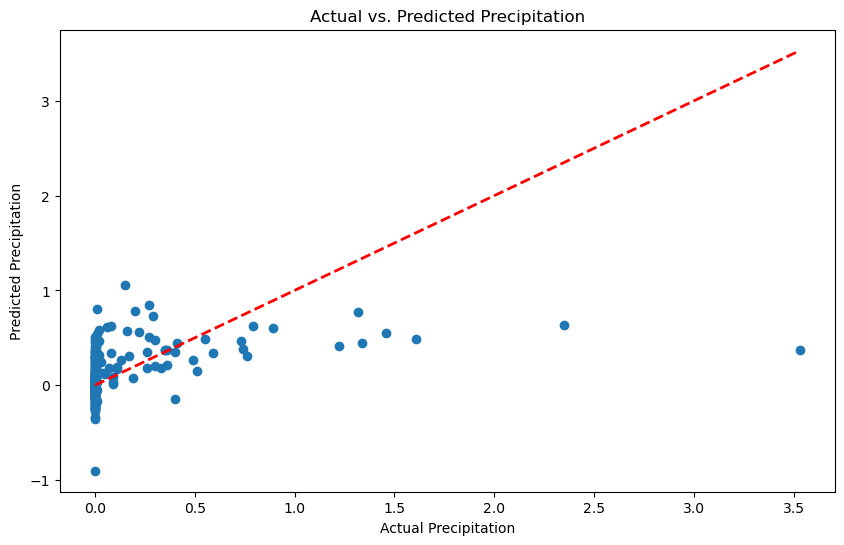

In [6]:
# Visualize Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Precipitation')
plt.ylabel('Predicted Precipitation')
plt.title('Actual vs. Predicted Precipitation')
plt.savefig('actual_vs_predicted_precipitation.png')
plt.show()

## 7. Conclusion

In this project, we successfully built a linear regression model to predict precipitation in Austin. The EDA revealed that humidity and dew point have the highest correlation with precipitation.

However, the model's performance was quite low, with an **R-squared value of approximately 0.08**. This indicates that our linear model, using the selected features, can only explain about 8% of the variability in precipitation. The scatter plot of actual vs. predicted values also shows that the model struggles to predict higher amounts of precipitation accurately.

This suggests that predicting precipitation is a complex task, and a simple linear regression model is not sufficient. More advanced models, additional features (like historical weather data), or non-linear approaches might be needed to achieve better predictive performance.